In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [104]:
data = pd.read_csv("msft.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'msft.csv'

In [47]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,22.062500,22.500000,21.437500,21.687500,13.396488,82413200
1,2001-01-03,21.593750,24.437500,21.562500,23.968750,14.805620,135962200
2,2001-01-04,23.906250,25.250000,23.437500,24.218750,14.960052,112397000
3,2001-01-05,24.250000,24.937500,23.781250,24.562500,15.172381,93414600
4,2001-01-08,24.468750,24.875000,23.343750,24.468750,15.114478,79817600
...,...,...,...,...,...,...,...
5780,2023-12-22,373.679993,375.179993,372.709991,374.579987,373.215424,17091100
5781,2023-12-26,375.000000,376.940002,373.500000,374.660004,373.295135,12673100
5782,2023-12-27,373.690002,375.059998,372.809998,374.070007,372.707275,14905400
5783,2023-12-28,375.369995,376.459991,374.160004,375.279999,373.912842,14327000


In [48]:
data['Date'] = pd.to_datetime(data['Date'])

columns_to_round = ['Open', 'High', 'Low', 'Close', 'Adj Close']
data[columns_to_round] = data[columns_to_round].round(2)

data.set_index('Date', inplace=True)

print(data.head())

             Open   High    Low  Close  Adj Close     Volume
Date                                                        
2001-01-02  22.06  22.50  21.44  21.69      13.40   82413200
2001-01-03  21.59  24.44  21.56  23.97      14.81  135962200
2001-01-04  23.91  25.25  23.44  24.22      14.96  112397000
2001-01-05  24.25  24.94  23.78  24.56      15.17   93414600
2001-01-08  24.47  24.88  23.34  24.47      15.11   79817600


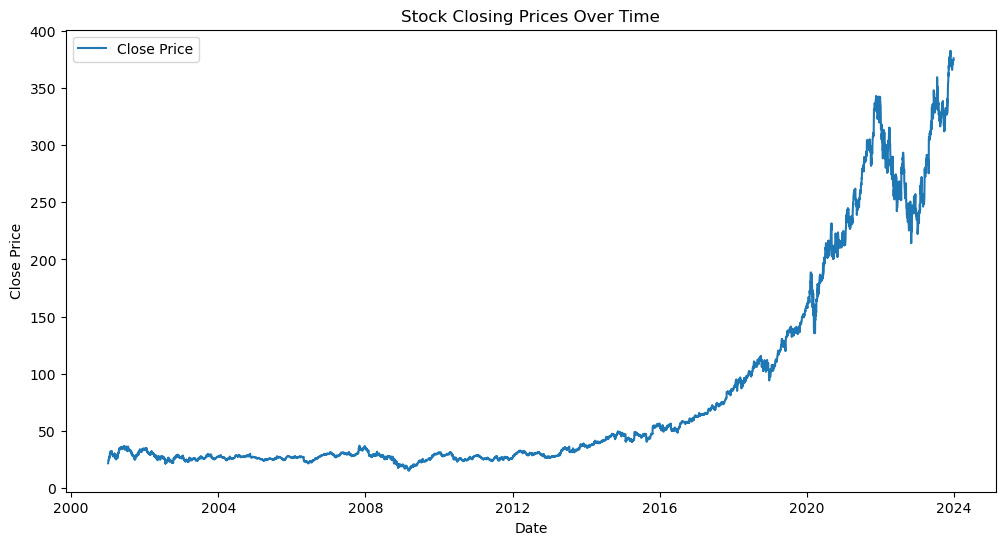

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

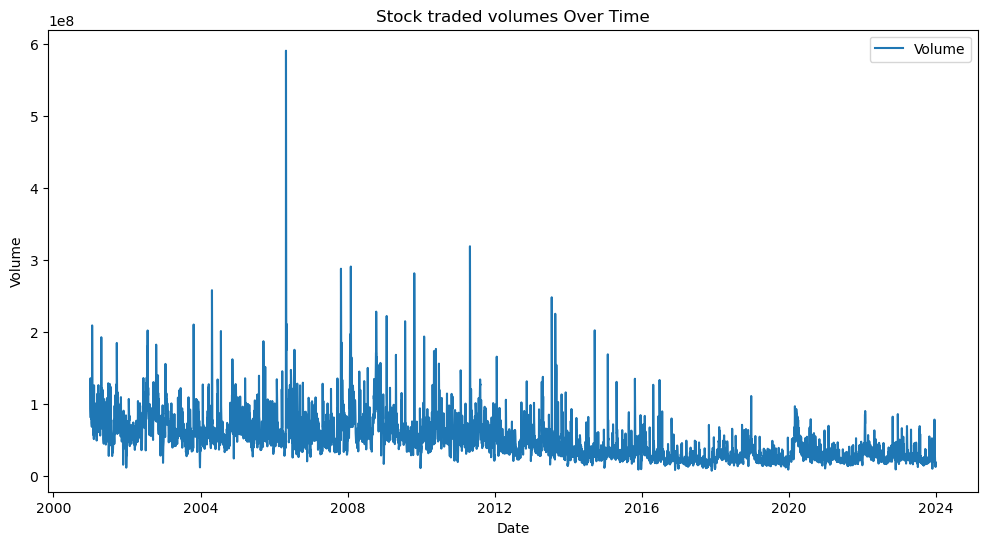

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'], label='Volume')
plt.title('Stock traded volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [50]:
# creating a new column "intraday_change" = open - close to understand intraday changes in the data
data['intraday_change'] = (data['Close'] - data['Open']).abs()
# Determine intraday change trend
data['intraday_change_trend'] = ['positive' if (close - open) > 0 else 'negative' for open, close in zip(data['Open'], data['Close'])]

In [51]:
data

,Open,High,Low,Close,Adj Close,Volume,intraday_change,intraday_change_trend
Date,,,,,,,,
2001-01-02,22.06,22.50,21.44,21.69,13.40,82413200,0.37,negative
2001-01-03,21.59,24.44,21.56,23.97,14.81,135962200,2.38,positive
2001-01-04,23.91,25.25,23.44,24.22,14.96,112397000,0.31,positive
2001-01-05,24.25,24.94,23.78,24.56,15.17,93414600,0.31,positive
2001-01-08,24.47,24.88,23.34,24.47,15.11,79817600,0.00,negative
...,...,...,...,...,...,...,...,...
2023-12-22,373.68,375.18,372.71,374.58,373.22,17091100,0.90,positive
2023-12-26,375.00,376.94,373.50,374.66,373.30,12673100,0.34,negative
2023-12-27,373.69,375.06,372.81,374.07,372.71,14905400,0.38,positive


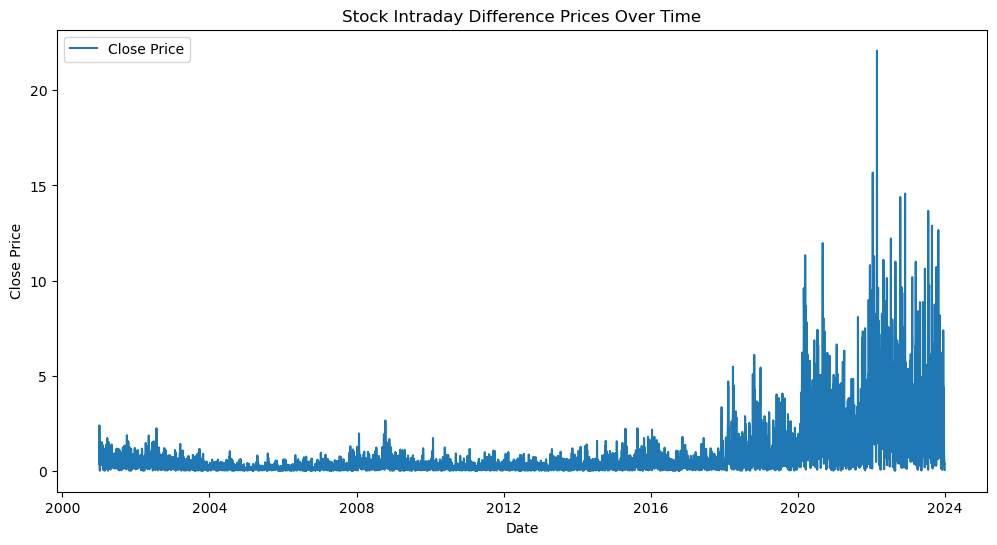

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(data['intraday_change'], label='Close Price')
plt.title('Stock Intraday Difference Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

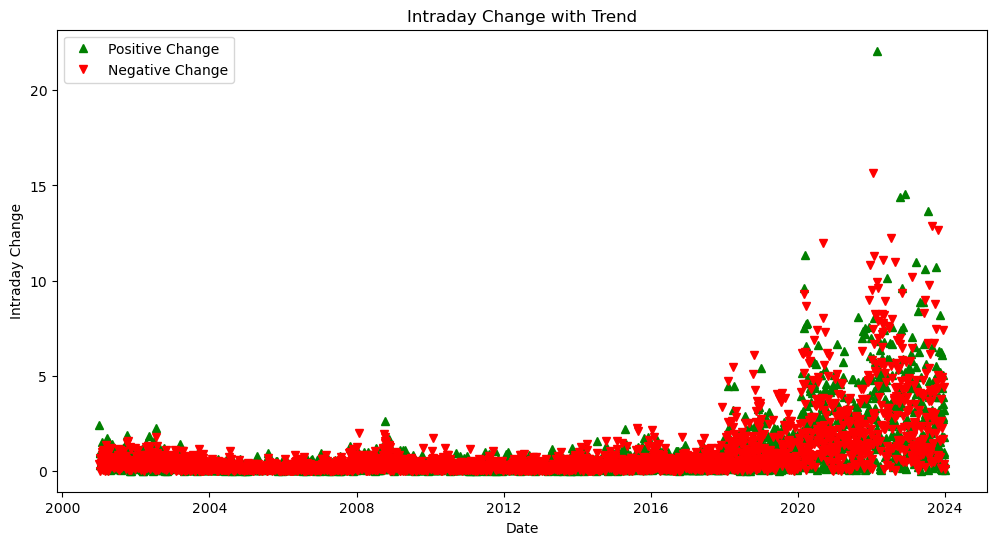

In [53]:
positive_trend = data[data['intraday_change_trend'] == 'positive']
negative_trend = data[data['intraday_change_trend'] == 'negative']

plt.figure(figsize=(12, 6))

# Plot positive trends in green
plt.plot(positive_trend.index, positive_trend['intraday_change'], 'g^', label='Positive Change')

# Plot negative trends in red
plt.plot(negative_trend.index, negative_trend['intraday_change'], 'rv', label='Negative Change')

plt.title('Intraday Change with Trend')
plt.xlabel('Date')
plt.ylabel('Intraday Change')
plt.legend()
plt.show()

## Decomposition to find trend, seasonality and residuals (additive)

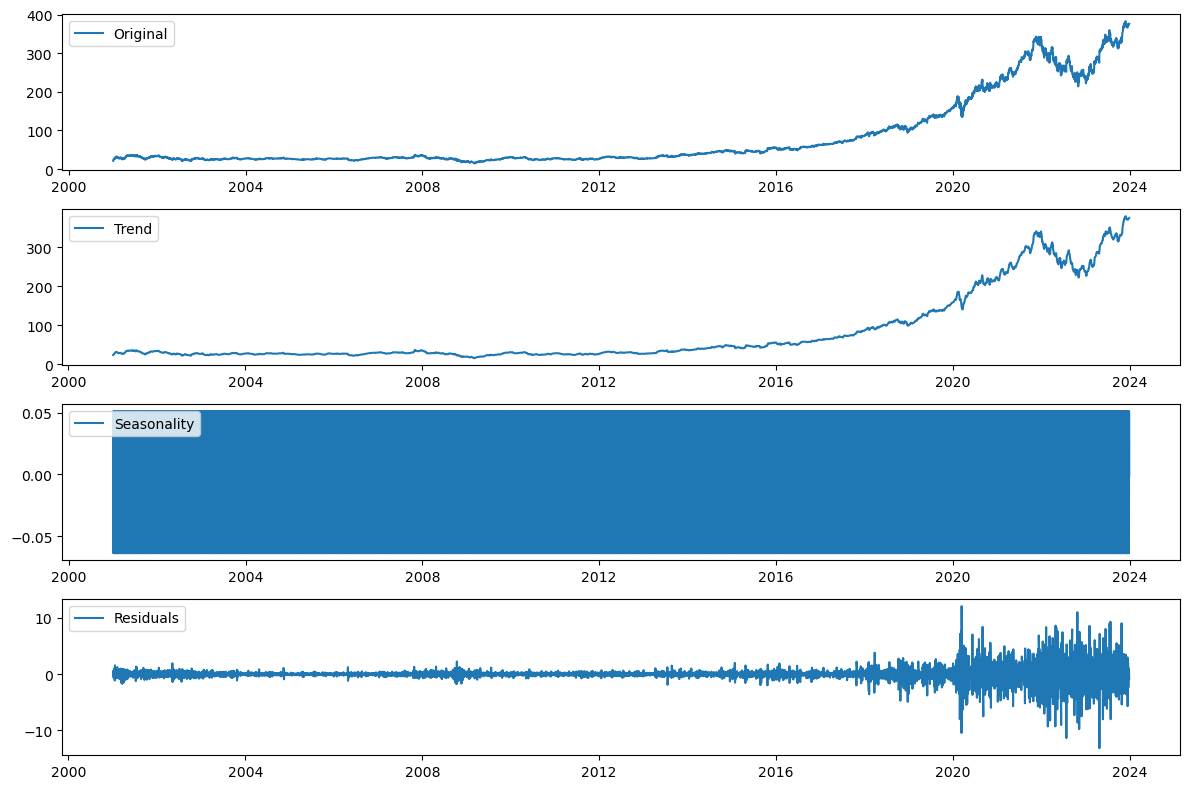

In [57]:
decomposition = sm.tsa.seasonal_decompose(data['Close'], model='additive', period=5)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Decomposition to find trend, seasonality and residuals (multiplicative)

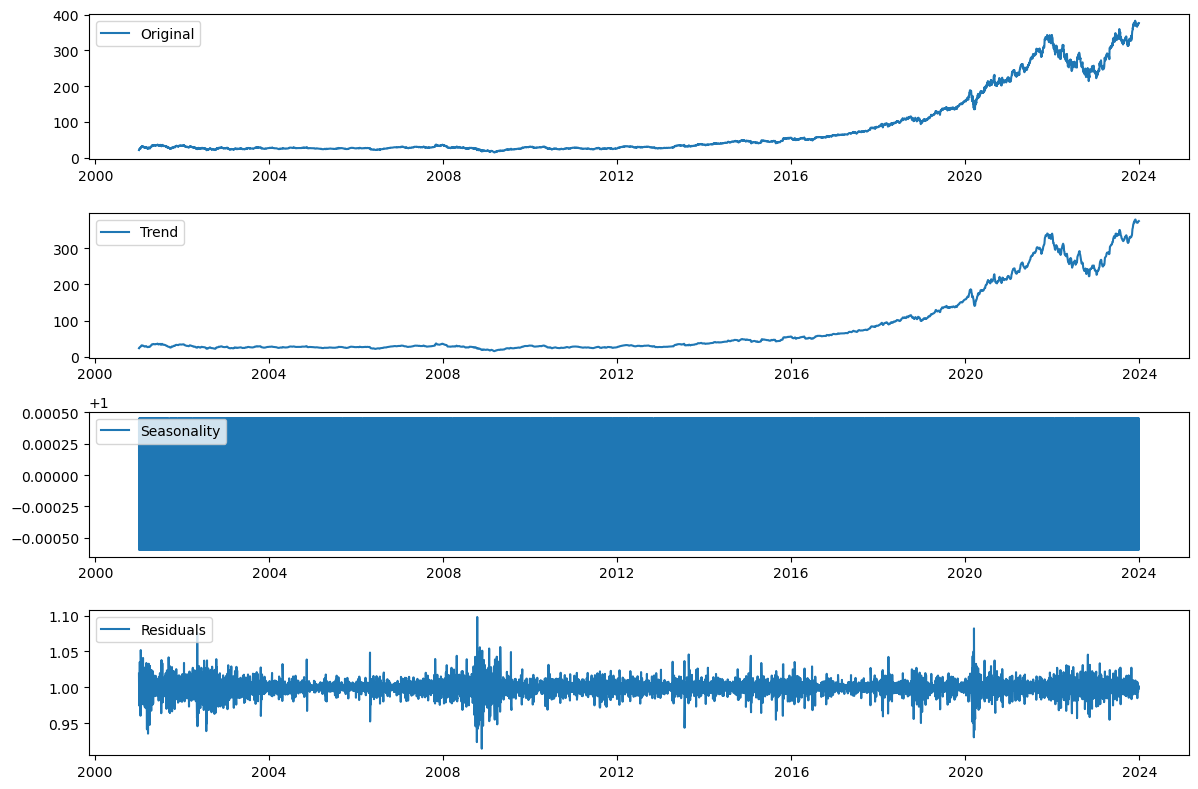

In [58]:
decomposition = sm.tsa.seasonal_decompose(data['Close'], model='multiplicative', period=5)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Analyzing how the stock performed during covid and recession

In [61]:
# seperating covid and recession data

covid_start = pd.Timestamp('2020-03-01')
covid_end = pd.Timestamp('2021-12-31')

crisis_start = pd.Timestamp('2007-07-01')
crisis_end = pd.Timestamp('2009-06-30')

# Filter out COVID-19 and 2008 Financial Crisis periods
covid_data = data[(data.index >= covid_start) & (data.index <= covid_end)]
crisis_data = data[(data.index >= crisis_start) & (data.index <= crisis_end)]

In [63]:
covid_data.head()

,Open,High,Low,Close,Adj Close,Volume,intraday_change,intraday_change_trend
Date,,,,,,,,
2020-03-02,165.31,172.92,162.31,172.79,166.35,71030800,7.48,positive
2020-03-03,173.80,175.00,162.26,164.51,158.38,71677000,9.29,negative
2020-03-04,168.49,170.70,165.62,170.55,164.20,49814400,2.06,positive
2020-03-05,166.05,170.87,165.69,166.27,160.08,47817300,0.22,positive
2020-03-06,162.61,163.11,156.00,161.57,155.55,72821100,1.04,negative


### Recession data

In [65]:
crisis_data.head()

,Open,High,Low,Close,Adj Close,Volume,intraday_change,intraday_change_trend
Date,,,,,,,,
2007-07-02,29.67,29.80,29.49,29.74,21.42,47316000,0.07,positive
2007-07-03,29.79,30.22,29.78,30.02,21.62,35202600,0.23,positive
2007-07-05,30.05,30.22,29.83,29.99,21.60,47838500,0.06,negative
2007-07-06,29.91,30.04,29.66,29.97,21.58,57541000,0.06,positive
2007-07-09,29.86,29.95,29.81,29.87,21.51,33831400,0.01,positive


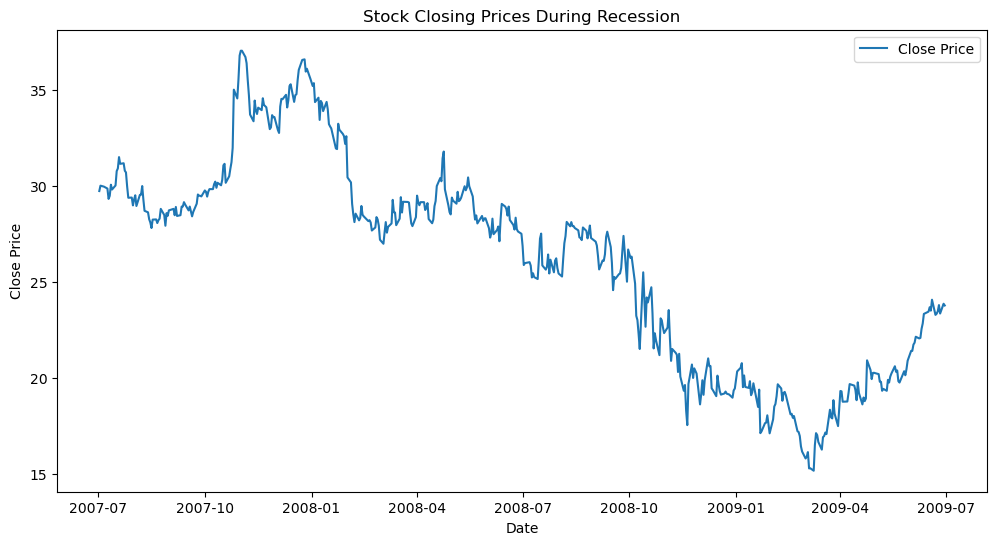

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(crisis_data['Close'], label='Close Price')
plt.title('Stock Closing Prices During Recession')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

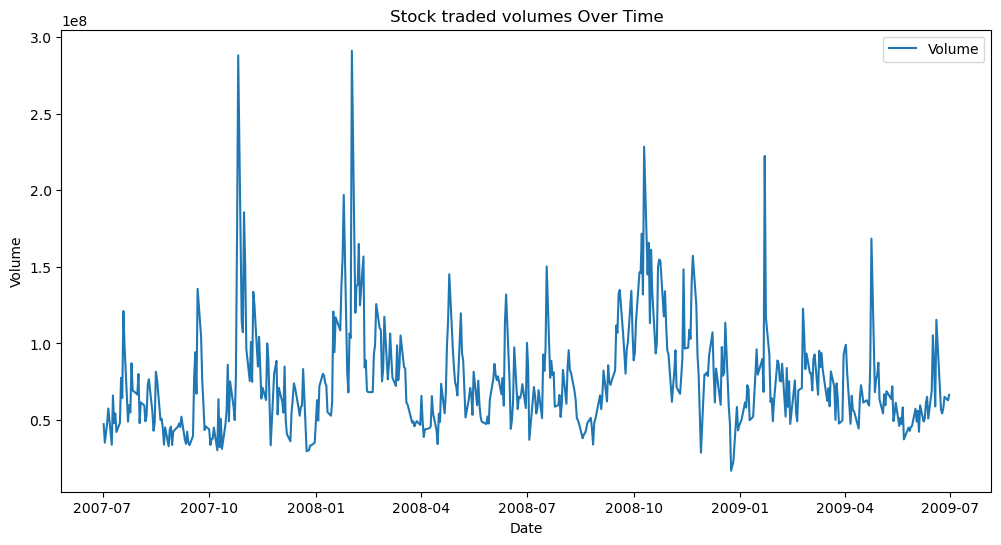

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(crisis_data['Volume'], label='Volume')
plt.title('Stock traded volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

### Decomposition to find trend, seasonality and residuals (additive)

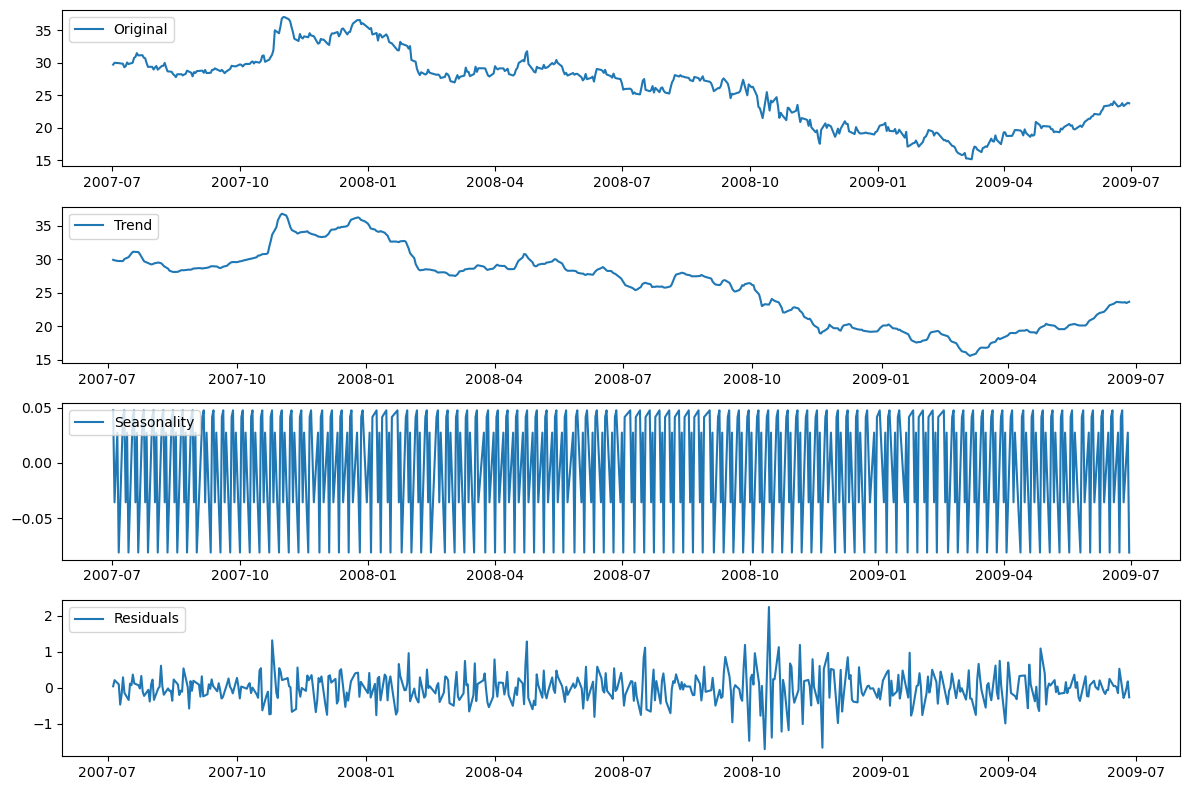

In [70]:
decomposition = sm.tsa.seasonal_decompose(crisis_data['Close'], model='additive', period=5)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(crisis_data['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Covid Data

In [71]:
covid_data.head()

,Open,High,Low,Close,Adj Close,Volume,intraday_change,intraday_change_trend
Date,,,,,,,,
2020-03-02,165.31,172.92,162.31,172.79,166.35,71030800,7.48,positive
2020-03-03,173.80,175.00,162.26,164.51,158.38,71677000,9.29,negative
2020-03-04,168.49,170.70,165.62,170.55,164.20,49814400,2.06,positive
2020-03-05,166.05,170.87,165.69,166.27,160.08,47817300,0.22,positive
2020-03-06,162.61,163.11,156.00,161.57,155.55,72821100,1.04,negative


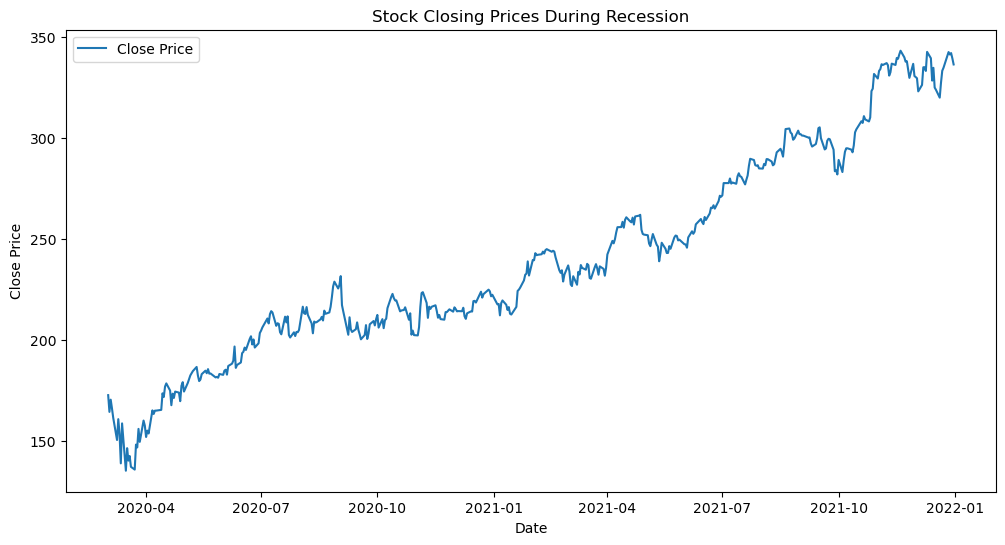

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(covid_data['Close'], label='Close Price')
plt.title('Stock Closing Prices During Recession')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

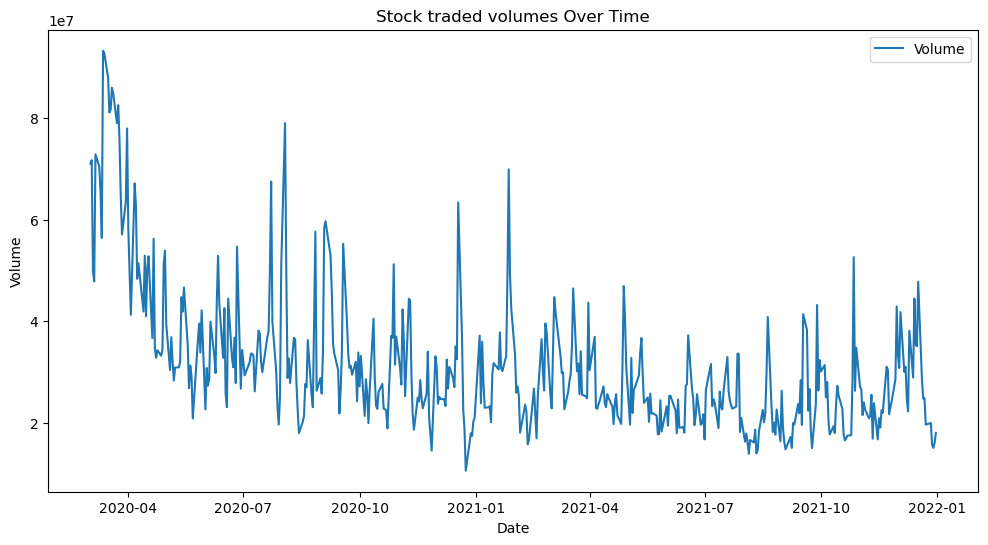

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(covid_data['Volume'], label='Volume')
plt.title('Stock traded volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

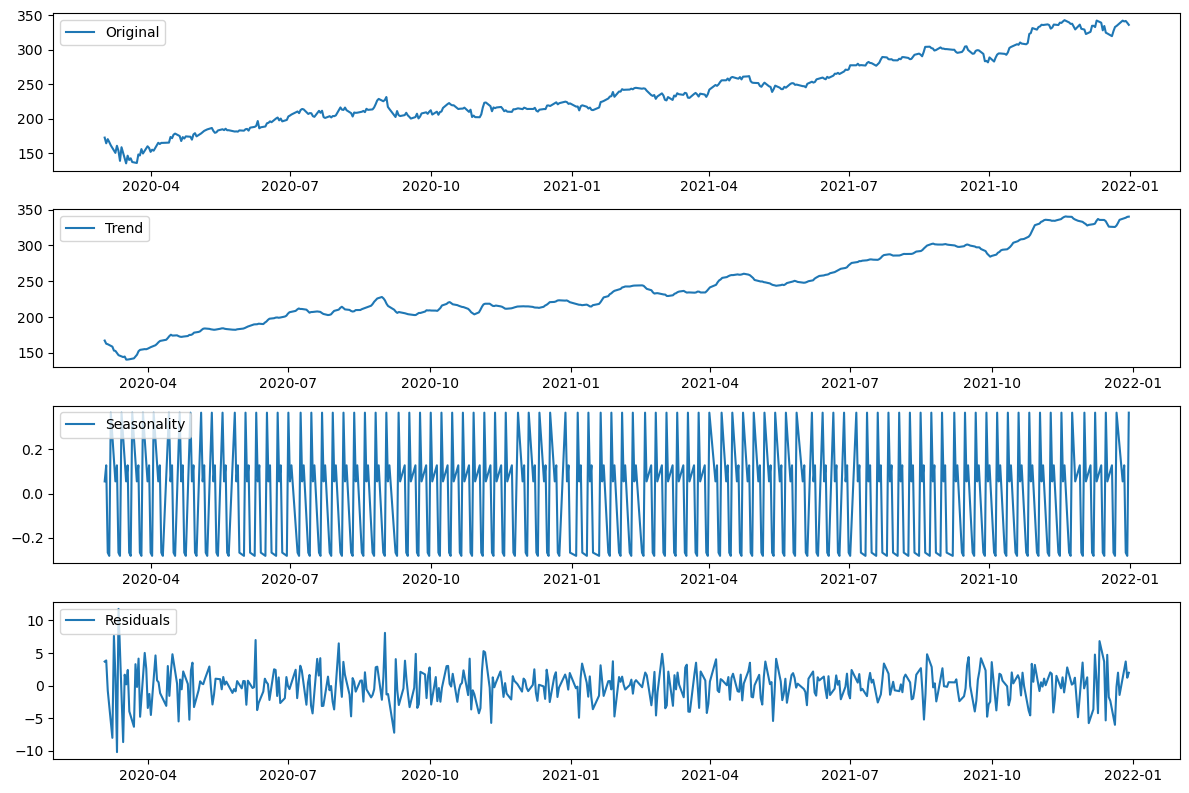

In [76]:
decomposition = sm.tsa.seasonal_decompose(covid_data['Close'], model='additive', period=5)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(covid_data['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [77]:
import yfinance as yf

In [80]:
GetFacebookInformation = yf.Ticker("META")

print(type(GetFacebookInformation.history(period="max")))

<class 'pandas.core.frame.DataFrame'>


In [82]:
GetFacebookInformation.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,41.963766,44.907717,37.922072,38.151600,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.455086,36.584820,32.932326,33.960213,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.543127,33.521117,30.876552,30.936428,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.305670,32.433352,31.295691,31.934378,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.882431,33.141896,31.704851,32.962265,50237200,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-06 00:00:00-04:00,479.000000,502.559998,478.649994,494.089996,20955000,0.0,0.0
2024-08-07 00:00:00-04:00,503.130005,510.149994,486.859985,488.920013,20105300,0.0,0.0
2024-08-08 00:00:00-04:00,497.500000,509.959991,494.720001,509.630005,16156800,0.0,0.0


In [85]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'intraday_change', 'intraday_change_trend'],
      dtype='object')

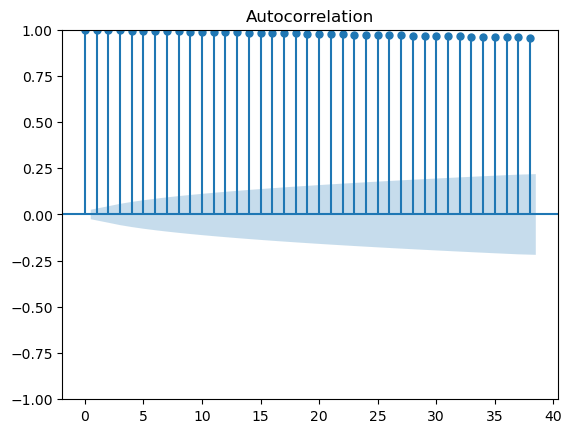

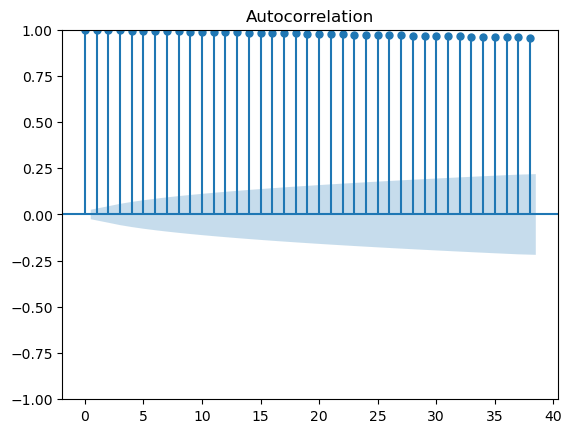

In [102]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data[['Close']])

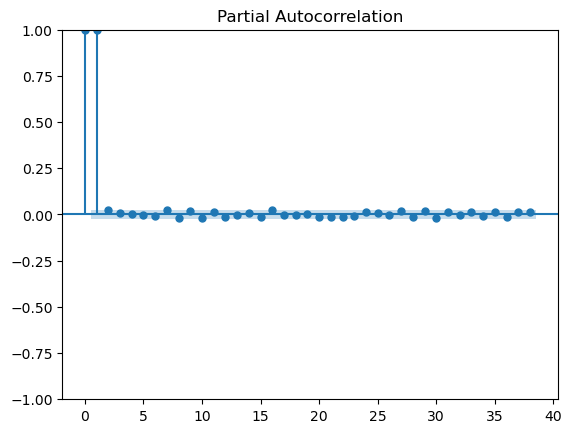

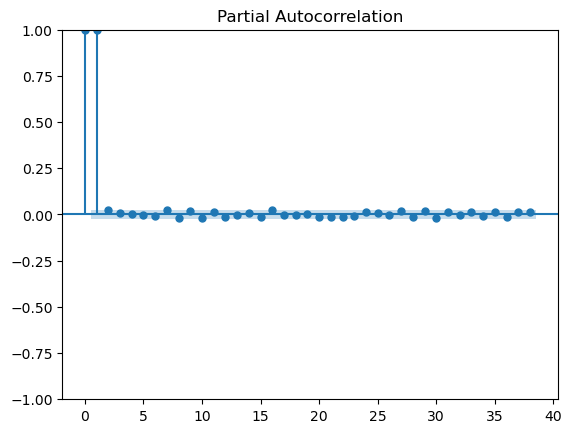

In [103]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data[['Close']])

In [99]:
GetFacebookInformation = yf.Ticker("META")
d = GetFacebookInformation.history(period="max")

In [100]:
d

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,41.963766,44.907717,37.922072,38.151600,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.455086,36.584820,32.932326,33.960213,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.543127,33.521117,30.876552,30.936428,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.305670,32.433352,31.295691,31.934378,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.882431,33.141896,31.704851,32.962265,50237200,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-06 00:00:00-04:00,479.000000,502.559998,478.649994,494.089996,20955000,0.0,0.0
2024-08-07 00:00:00-04:00,503.130005,510.149994,486.859985,488.920013,20105300,0.0,0.0
2024-08-08 00:00:00-04:00,497.500000,509.959991,494.720001,509.630005,16156800,0.0,0.0
